In [1]:
import numpy as np

In [2]:
def LLfunction(target,predicted_values):
    p_v_zero=lambda predicted_values: 0 if predicted_values<=0 else predicted_values
    p_v_pos=lambda predicted_values: 0.000001 if predicted_values<=0 else predicted_values
    return sum(targets*np.log(p_v_pos))-sum(p_v_zero)

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('MSHA_Mine_Data_2013-2016.csv')

In [5]:
len(data)

53746

In [6]:
data.describe(include='all')

,YEAR,US_STATE,COMMODITY,PRIMARY,SEAM_HEIGHT,TYPE_OF_MINE,MINE_STATUS,AVG_EMP_TOTAL,EMP_HRS_TOTAL,PCT_HRS_UNDERGROUND,PCT_HRS_SURFACE,PCT_HRS_STRIP,PCT_HRS_AUGER,PCT_HRS_CULM_BANK,PCT_HRS_DREDGE,PCT_HRS_OTHER_SURFACE,PCT_HRS_SHOP_YARD,PCT_HRS_MILL_PREP,PCT_HRS_OFFICE,NUM_INJURIES
count,53746.000000,53738,53746,53742,53746.000000,53746,53727,53746.000000,5.374600e+04,53746.000000,53746.000000,53746.000000,53746.000000,53746.000000,53746.000000,53746.000000,53746.00000,53746.000000,53746.000000,53746.000000
unique,NaN,55,5,79,NaN,4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,PA,Sand & gravel,Sand & gravel,NaN,Sand & gravel,Intermittent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3501,25414,24030,NaN,25414,23039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2014.478417,NaN,NaN,NaN,5.839486,NaN,NaN,17.841905,3.554192e+04,0.034452,0.008712,0.680090,0.004576,0.004636,0.044954,0.000725,0.00357,0.106046,0.112239,0.470491
std,1.117420,NaN,NaN,NaN,77.296043,NaN,NaN,64.288628,1.393492e+05,0.165360,0.066982,0.392335,0.066771,0.066380,0.194561,0.025493,0.05691,0.251413,0.176419,2.337437
min,2013.000000,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2013.000000,NaN,NaN,NaN,0.000000,NaN,NaN,3.000000,1.737250e+03,0.000000,0.000000,0.329915,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2014.000000,NaN,NaN,NaN,0.000000,NaN,NaN,5.000000,6.824500e+03,0.000000,0.000000,0.888745,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.031250,0.000000
75%,2015.000000,NaN,NaN,NaN,0.000000,NaN,NaN,12.000000,2.217975e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.168451,0.000000


In [7]:
data.head()

,YEAR,US_STATE,COMMODITY,PRIMARY,SEAM_HEIGHT,TYPE_OF_MINE,MINE_STATUS,AVG_EMP_TOTAL,EMP_HRS_TOTAL,PCT_HRS_UNDERGROUND,PCT_HRS_SURFACE,PCT_HRS_STRIP,PCT_HRS_AUGER,PCT_HRS_CULM_BANK,PCT_HRS_DREDGE,PCT_HRS_OTHER_SURFACE,PCT_HRS_SHOP_YARD,PCT_HRS_MILL_PREP,PCT_HRS_OFFICE,NUM_INJURIES
0,2013,AL,Stone,Lime,0,Surface,Full-time permanent,117,261483,0.0,0.0,0.383635,0.0,0.0,0.0,0.0,0.0,0.585204,0.031161,2
1,2014,TX,Stone,Lime,0,Surface,Intermittent,7,15252,0.0,0.0,0.860543,0.0,0.0,0.0,0.0,0.0,0.000000,0.139457,0
2,2015,OH,Stone,Lime,0,Surface,Full-time permanent,55,118103,0.0,0.0,0.125526,0.0,0.0,0.0,0.0,0.0,0.823849,0.050625,0
3,2013,AL,Stone,Lime,0,Surface,Full-time permanent,57,143299,0.0,0.0,0.292089,0.0,0.0,0.0,0.0,0.0,0.515586,0.192325,3
4,2014,WA,Stone,Lime,0,Mill,Full-time permanent,20,36011,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.788537,0.211463,2


In [8]:
data_nomissing=data[~data['MINE_STATUS'].isnull()][~data['US_STATE'].isnull()][~data['PRIMARY'].isnull()]
data_nomissing.describe(include='all')

/Users/rena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,YEAR,US_STATE,COMMODITY,PRIMARY,SEAM_HEIGHT,TYPE_OF_MINE,MINE_STATUS,AVG_EMP_TOTAL,EMP_HRS_TOTAL,PCT_HRS_UNDERGROUND,PCT_HRS_SURFACE,PCT_HRS_STRIP,PCT_HRS_AUGER,PCT_HRS_CULM_BANK,PCT_HRS_DREDGE,PCT_HRS_OTHER_SURFACE,PCT_HRS_SHOP_YARD,PCT_HRS_MILL_PREP,PCT_HRS_OFFICE,NUM_INJURIES
count,53719.000000,53719,53719,53719,53719.000000,53719,53719,53719.000000,5.371900e+04,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000
unique,NaN,52,5,79,NaN,4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,PA,Sand & gravel,Sand & gravel,NaN,Sand & gravel,Intermittent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3501,25399,24022,NaN,25399,23039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2014.478341,NaN,NaN,NaN,5.842421,NaN,NaN,17.846404,3.555322e+04,0.034452,0.008633,0.680133,0.004579,0.004638,0.044940,0.000725,0.003572,0.106100,0.112229,0.470727
std,1.117410,NaN,NaN,NaN,77.315355,NaN,NaN,64.303317,1.393797e+05,0.165364,0.066545,0.392289,0.066788,0.066396,0.194523,0.025499,0.056925,0.251465,0.176382,2.338000
min,2013.000000,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,NaN,NaN,NaN,0.000000,NaN,NaN,3.000000,1.739000e+03,0.000000,0.000000,0.329982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,NaN,NaN,NaN,0.000000,NaN,NaN,5.000000,6.828000e+03,0.000000,0.000000,0.888703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000
75%,2015.000000,NaN,NaN,NaN,0.000000,NaN,NaN,12.000000,2.218900e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168450,0.000000


In [9]:
len(data)-len(data_nomissing)

27

In [10]:
data['PRIMARY'].value_counts()

Sand & gravel                     24030
Limestone, crushed and broken      7654
Coal, Bituminous                   5526
Stone, crushed and broken, NEC     3188
Stone, dimension, NEC              1634
                                  ...  
Beryl                                 4
Lithium                               3
Mica, dimension                       3
Brucite                               1
Cobalt                                1
Name: PRIMARY, Length: 79, dtype: int64

In [11]:
data['US_STATE'].value_counts()

PA    3501
TX    3014
WI    2480
MN    2387
NY    2339
CA    2017
KY    1935
MI    1594
OH    1485
CO    1448
WV    1399
NC    1263
IA    1229
MO    1228
VA    1208
WA    1194
IL    1189
UT    1154
AZ    1075
TN    1071
MT    1065
IN    1051
OR    1045
ND     905
ID     904
ME     875
KS     872
NV     868
GA     859
OK     853
AL     801
FL     780
VT     763
WY     717
AR     695
MA     673
SD     657
NE     628
NM     599
AK     584
NH     534
LA     495
CT     475
MD     331
NJ     299
MS     299
PR     284
SC     250
HI     165
RI     149
DE      36
VI      12
MP       3
GU       1
AS       1
Name: US_STATE, dtype: int64

In [12]:
data_reduced=data_nomissing.copy()
data_reduced['PRIMARY']=np.nan
data_reduced['US_STATE']=np.nan
data_reduced.describe(include='all')

,YEAR,US_STATE,COMMODITY,PRIMARY,SEAM_HEIGHT,TYPE_OF_MINE,MINE_STATUS,AVG_EMP_TOTAL,EMP_HRS_TOTAL,PCT_HRS_UNDERGROUND,PCT_HRS_SURFACE,PCT_HRS_STRIP,PCT_HRS_AUGER,PCT_HRS_CULM_BANK,PCT_HRS_DREDGE,PCT_HRS_OTHER_SURFACE,PCT_HRS_SHOP_YARD,PCT_HRS_MILL_PREP,PCT_HRS_OFFICE,NUM_INJURIES
count,53719.000000,0.0,53719,0.0,53719.000000,53719,53719,53719.000000,5.371900e+04,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000
unique,NaN,NaN,5,NaN,NaN,4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Sand & gravel,NaN,NaN,Sand & gravel,Intermittent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,25399,NaN,NaN,25399,23039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2014.478341,NaN,NaN,NaN,5.842421,NaN,NaN,17.846404,3.555322e+04,0.034452,0.008633,0.680133,0.004579,0.004638,0.044940,0.000725,0.003572,0.106100,0.112229,0.470727
std,1.117410,NaN,NaN,NaN,77.315355,NaN,NaN,64.303317,1.393797e+05,0.165364,0.066545,0.392289,0.066788,0.066396,0.194523,0.025499,0.056925,0.251465,0.176382,2.338000
min,2013.000000,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,NaN,NaN,NaN,0.000000,NaN,NaN,3.000000,1.739000e+03,0.000000,0.000000,0.329982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,NaN,NaN,NaN,0.000000,NaN,NaN,5.000000,6.828000e+03,0.000000,0.000000,0.888703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000
75%,2015.000000,NaN,NaN,NaN,0.000000,NaN,NaN,12.000000,2.218900e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168450,0.000000


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

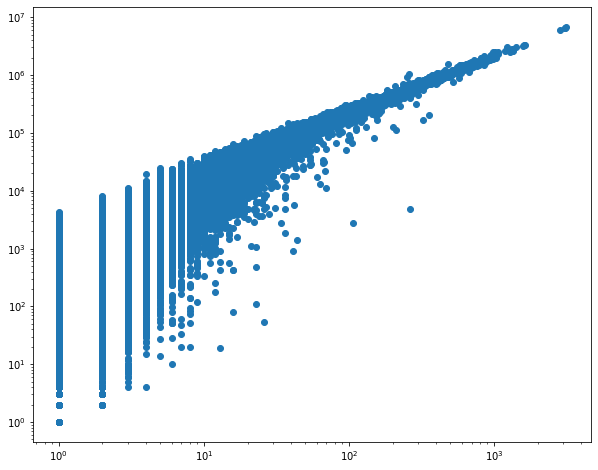

In [14]:
plt.figure(figsize=(10,8))
#plt.style.use('ggplot')
plt.scatter(data_reduced['AVG_EMP_TOTAL'],data_reduced['EMP_HRS_TOTAL'])
plt.xscale('log')
plt.yscale('log')

In [15]:
from collections import Counter

count    53719.000000
mean         0.104421
std          9.187299
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2000.000000
Name: INJ_RATE_PER2K, dtype: float64
       YEAR  US_STATE      COMMODITY  PRIMARY  SEAM_HEIGHT   TYPE_OF_MINE  \
26818  2015       NaN  Sand & gravel      NaN            0  Sand & gravel   

        MINE_STATUS  AVG_EMP_TOTAL  EMP_HRS_TOTAL  PCT_HRS_UNDERGROUND  ...  \
26818  Intermittent              1              1                  0.0  ...   

       PCT_HRS_STRIP  PCT_HRS_AUGER  PCT_HRS_CULM_BANK  PCT_HRS_DREDGE  \
26818            1.0            0.0                0.0             0.0   

       PCT_HRS_OTHER_SURFACE  PCT_HRS_SHOP_YARD  PCT_HRS_MILL_PREP  \
26818                    0.0                0.0                0.0   

       PCT_HRS_OFFICE  NUM_INJURIES  INJ_RATE_PER2K  
26818             0.0             1          2000.0  

[1 rows x 21 columns]
               YEAR  US_STATE  PRIMARY   SEAM_HEIGHT

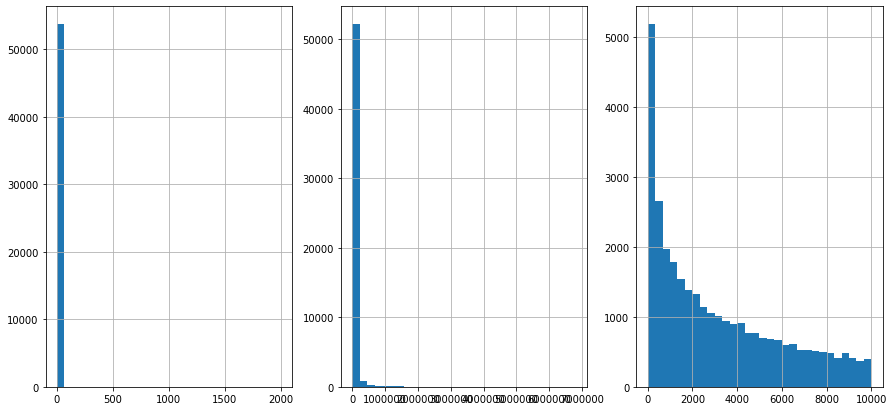

In [16]:
fig,ax=plt.subplots(ncols=3,figsize=(15,7))
data_reduced['INJ_RATE_PER2K']=data_reduced['NUM_INJURIES']/data_reduced['EMP_HRS_TOTAL']*2000
data_reduced['INJ_RATE_PER2K'].hist(ax=ax[0],bins=30)
print(data_reduced['INJ_RATE_PER2K'].describe())
print(data_reduced[data_reduced['INJ_RATE_PER2K']==2000])
data_reduced['EMP_HRS_TOTAL'].hist(ax=ax[1],bins=30)
data_reduced[data_reduced['EMP_HRS_TOTAL']<=10000]['EMP_HRS_TOTAL'].hist(ax=ax[2],bins=30)
print(data_reduced[data_reduced['INJ_RATE_PER2K']<2000].describe())
print(Counter(data_reduced[data_reduced['EMP_HRS_TOTAL']<2000]['MINE_STATUS']))
print(data_reduced[data_reduced['EMP_HRS_TOTAL']<2000]['MINE_STATUS'].value_counts(normalize=True))

In [17]:
no_good=['Closed by MSHA','Non-producing','Permanently abandoned','Temporarily closed']
data_reduced2=data_reduced.copy()
data_reduced2=data_reduced2[data_reduced2['MINE_STATUS'].apply(lambda x: x not in no_good)]
data_reduced2.head()

,YEAR,US_STATE,COMMODITY,PRIMARY,SEAM_HEIGHT,TYPE_OF_MINE,MINE_STATUS,AVG_EMP_TOTAL,EMP_HRS_TOTAL,PCT_HRS_UNDERGROUND,...,PCT_HRS_STRIP,PCT_HRS_AUGER,PCT_HRS_CULM_BANK,PCT_HRS_DREDGE,PCT_HRS_OTHER_SURFACE,PCT_HRS_SHOP_YARD,PCT_HRS_MILL_PREP,PCT_HRS_OFFICE,NUM_INJURIES,INJ_RATE_PER2K
0,2013,NaN,Stone,NaN,0,Surface,Full-time permanent,117,261483,0.0,...,0.383635,0.0,0.0,0.0,0.0,0.0,0.585204,0.031161,2,0.015297
1,2014,NaN,Stone,NaN,0,Surface,Intermittent,7,15252,0.0,...,0.860543,0.0,0.0,0.0,0.0,0.0,0.000000,0.139457,0,0.000000
2,2015,NaN,Stone,NaN,0,Surface,Full-time permanent,55,118103,0.0,...,0.125526,0.0,0.0,0.0,0.0,0.0,0.823849,0.050625,0,0.000000
3,2013,NaN,Stone,NaN,0,Surface,Full-time permanent,57,143299,0.0,...,0.292089,0.0,0.0,0.0,0.0,0.0,0.515586,0.192325,3,0.041870
4,2014,NaN,Stone,NaN,0,Mill,Full-time permanent,20,36011,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.788537,0.211463,2,0.111077


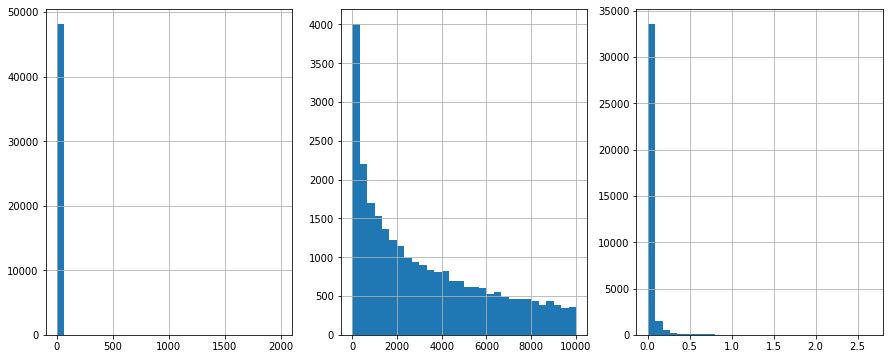

In [18]:
fig,ax=plt.subplots(ncols=3,figsize=(15,6))
data_reduced2['INJ_RATE_PER2K'].hist(ax=ax[0],bins=30)
data_reduced2[data_reduced2['EMP_HRS_TOTAL']<=10000]['EMP_HRS_TOTAL'].hist(ax=ax[1],bins=30)
data_reduced3=data_reduced2[data_reduced2['EMP_HRS_TOTAL']>=2000].copy()
data_reduced3['INJ_RATE_PER2K'].hist(ax=ax[2],bins=30)

In [19]:
pd.pivot_table(data_reduced3[['MINE_STATUS','COMMODITY']],index=['MINE_STATUS'],columns=['COMMODITY'],aggfunc=len,fill_value=0)

COMMODITY,Coal,Metal,Nonmetal,Sand & gravel,Stone
MINE_STATUS,,,,,
Active,3423,0,0,0,0
Full-time permanent,0,686,2107,7817,10319
Intermittent,0,203,465,7376,3724


In [24]:
data_reduced3['ADJ_STATUS']=data_reduced3['MINE_STATUS'].map({'Active':'Open','Full-time permanent':'Open','Intermittent':'Intermittent'})
data_reduced3=data_reduced3.drop('MINE_STATUS',axis=1)
data_reduced3.head()

,YEAR,US_STATE,COMMODITY,PRIMARY,SEAM_HEIGHT,TYPE_OF_MINE,AVG_EMP_TOTAL,EMP_HRS_TOTAL,PCT_HRS_UNDERGROUND,PCT_HRS_SURFACE,...,PCT_HRS_AUGER,PCT_HRS_CULM_BANK,PCT_HRS_DREDGE,PCT_HRS_OTHER_SURFACE,PCT_HRS_SHOP_YARD,PCT_HRS_MILL_PREP,PCT_HRS_OFFICE,NUM_INJURIES,INJ_RATE_PER2K,ADJ_STATUS
0,2013,NaN,Stone,NaN,0,Surface,117,261483,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.585204,0.031161,2,0.015297,Open
1,2014,NaN,Stone,NaN,0,Surface,7,15252,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.139457,0,0.000000,Intermittent
2,2015,NaN,Stone,NaN,0,Surface,55,118103,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.823849,0.050625,0,0.000000,Open
3,2013,NaN,Stone,NaN,0,Surface,57,143299,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.515586,0.192325,3,0.041870,Open
4,2014,NaN,Stone,NaN,0,Mill,20,36011,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.788537,0.211463,2,0.111077,Open


In [25]:
data_reduced3[data_reduced3['YEAR']==2013]['INJ_RATE_PER2K'].describe()

count    9240.000000
mean        0.022664
std         0.080521
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.141328
Name: INJ_RATE_PER2K, dtype: float64

In [26]:
data_reduced3[data_reduced3['YEAR']==2014]['INJ_RATE_PER2K'].describe()

count    9052.000000
mean        0.023808
std         0.085493
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.830943
Name: INJ_RATE_PER2K, dtype: float64

In [27]:
data_reduced3[data_reduced3['YEAR']==2015]['INJ_RATE_PER2K'].describe()

count    8960.000000
mean        0.021791
std         0.084081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.974334
Name: INJ_RATE_PER2K, dtype: float64

In [28]:
data_reduced3[data_reduced3['YEAR']==2016]['INJ_RATE_PER2K'].describe()

count    8868.000000
mean        0.021965
std         0.091908
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.663471
Name: INJ_RATE_PER2K, dtype: float64

In [29]:
data_reduced3=data_reduced3.drop('YEAR',axis=1)
data_reduced3.head()

,US_STATE,COMMODITY,PRIMARY,SEAM_HEIGHT,TYPE_OF_MINE,AVG_EMP_TOTAL,EMP_HRS_TOTAL,PCT_HRS_UNDERGROUND,PCT_HRS_SURFACE,PCT_HRS_STRIP,PCT_HRS_AUGER,PCT_HRS_CULM_BANK,PCT_HRS_DREDGE,PCT_HRS_OTHER_SURFACE,PCT_HRS_SHOP_YARD,PCT_HRS_MILL_PREP,PCT_HRS_OFFICE,NUM_INJURIES,INJ_RATE_PER2K,ADJ_STATUS
0,NaN,Stone,NaN,0,Surface,117,261483,0.0,0.0,0.383635,0.0,0.0,0.0,0.0,0.0,0.585204,0.031161,2,0.015297,Open
1,NaN,Stone,NaN,0,Surface,7,15252,0.0,0.0,0.860543,0.0,0.0,0.0,0.0,0.0,0.000000,0.139457,0,0.000000,Intermittent
2,NaN,Stone,NaN,0,Surface,55,118103,0.0,0.0,0.125526,0.0,0.0,0.0,0.0,0.0,0.823849,0.050625,0,0.000000,Open
3,NaN,Stone,NaN,0,Surface,57,143299,0.0,0.0,0.292089,0.0,0.0,0.0,0.0,0.0,0.515586,0.192325,3,0.041870,Open
4,NaN,Stone,NaN,0,Mill,20,36011,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.788537,0.211463,2,0.111077,Open


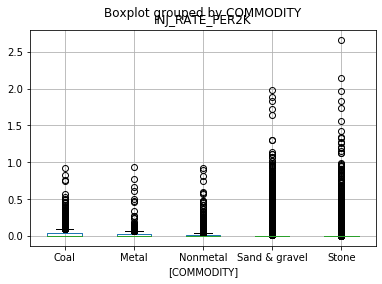

In [32]:
data_reduced3.boxplot(column=['INJ_RATE_PER2K'],by=['COMMODITY'])

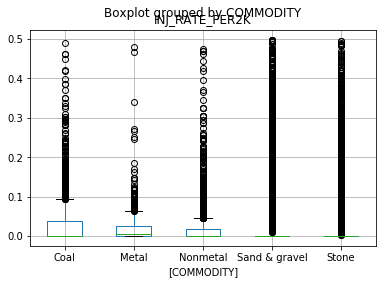

In [33]:
data_reduced3[data_reduced3['INJ_RATE_PER2K']<.5].boxplot(column=['INJ_RATE_PER2K'],by=['COMMODITY'])

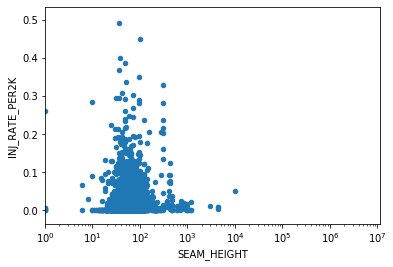

In [52]:
data_reduced3[data_reduced3['INJ_RATE_PER2K']<.5].plot.scatter(y='INJ_RATE_PER2K',x='SEAM_HEIGHT',logx=True,xlim=(1,0))

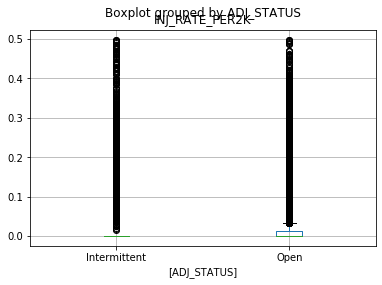

In [53]:
data_reduced3[data_reduced3['INJ_RATE_PER2K']<.5].boxplot(column=['INJ_RATE_PER2K'],by=['ADJ_STATUS'])

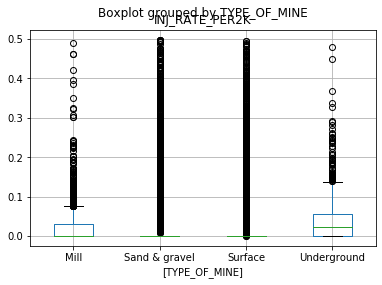

In [54]:
data_reduced3[data_reduced3['INJ_RATE_PER2K']<.5].boxplot(column=['INJ_RATE_PER2K'],by=['TYPE_OF_MINE'])

In [55]:
from sklearn.model_selection import train_test_split

In [58]:
train,test=train_test_split(data_reduced3,test_size=0.25,random_state=0)
train['INJ_RATE_PER2K'].mean(),test['INJ_RATE_PER2K'].mean()

(0.02261478828726322, 0.022405653996357196)

In [101]:
#tree.reduced <- rpart(cbind(EMP_HRS_TOTAL/2000, NUM_INJURIES) ~ . - EMP_HRS_TOTAL,data = train,method = "poisson",control = rpart.control(minbucket = 25, cp = 0, maxdepth = 10))
from sklearn import tree
#from sklearn.multioutput import MultiOutputRegressor
import warnings

warnings.filterwarnings('ignore')

In [102]:
y_1=np.array(data_reduced3['EMP_HRS_TOTAL']/2000)
y_2=np.array(data_reduced3['NUM_INJURIES'])
Y=np.vstack((y_1,y_2)).T
Y

array([[130.7415,   2.    ],
       [  7.626 ,   0.    ],
       [ 59.0515,   0.    ],
       ...,
       [ 36.719 ,   1.    ],
       [ 16.7055,   0.    ],
       [ 52.815 ,   2.    ]])

In [135]:
X_raw1=data_reduced3.drop(['EMP_HRS_TOTAL','NUM_INJURIES','US_STATE','PRIMARY'],axis=1)
factorize=pd.get_dummies(X_raw1[['COMMODITY','TYPE_OF_MINE','ADJ_STATUS']])
X_raw2=X_raw1.drop(['COMMODITY','TYPE_OF_MINE','ADJ_STATUS'],axis=1)
X=pd.concat([X_raw2,factorize],axis=1)
X.columns.tolist()

['SEAM_HEIGHT',
 'AVG_EMP_TOTAL',
 'PCT_HRS_UNDERGROUND',
 'PCT_HRS_SURFACE',
 'PCT_HRS_STRIP',
 'PCT_HRS_AUGER',
 'PCT_HRS_CULM_BANK',
 'PCT_HRS_DREDGE',
 'PCT_HRS_OTHER_SURFACE',
 'PCT_HRS_SHOP_YARD',
 'PCT_HRS_MILL_PREP',
 'PCT_HRS_OFFICE',
 'INJ_RATE_PER2K',
 'COMMODITY_Coal',
 'COMMODITY_Metal',
 'COMMODITY_Nonmetal',
 'COMMODITY_Sand & gravel',
 'COMMODITY_Stone',
 'TYPE_OF_MINE_Mill',
 'TYPE_OF_MINE_Sand & gravel',
 'TYPE_OF_MINE_Surface',
 'TYPE_OF_MINE_Underground',
 'ADJ_STATUS_Intermittent',
 'ADJ_STATUS_Open']

In [121]:
tree_reduced=tree.DecisionTreeRegressor(min_samples_split=75,min_samples_leaf=25,max_depth=10,random_state=0)
#tree_reduced=MultiOutputRegressor(reg)
tree_reduced.fit(X.values,Y)
pruning=tree_reduced.cost_complexity_pruning_path(X.values,Y)
ccp_alphas,impurities=pruning.ccp_alphas,pruning.impurities
ccp_alphas,impurities

(array([0.00000000e+00, 5.51539330e-04, 5.88874895e-04, 6.04951034e-04,
        7.00272679e-04, 7.23301411e-04, 7.70543976e-04, 7.99127733e-04,
        8.20899761e-04, 8.42142345e-04, 8.81817876e-04, 1.00755800e-03,
        1.01214947e-03, 1.05614155e-03, 1.08161850e-03, 1.10720890e-03,
        1.17676320e-03, 1.22726875e-03, 1.27225217e-03, 1.28765680e-03,
        1.31621403e-03, 1.40586835e-03, 1.44994005e-03, 1.52842658e-03,
        1.54583972e-03, 1.57719719e-03, 1.60158134e-03, 1.66912838e-03,
        1.67115823e-03, 1.69353797e-03, 1.75913328e-03, 1.76406217e-03,
        1.77855457e-03, 1.83860181e-03, 2.05850083e-03, 2.08639391e-03,
        2.20444126e-03, 2.24416532e-03, 2.28814648e-03, 2.30088509e-03,
        2.40723915e-03, 2.41965380e-03, 2.48947374e-03, 2.49634014e-03,
        2.56136822e-03, 2.61138222e-03, 2.62147587e-03, 2.72059123e-03,
        2.73415442e-03, 2.73610444e-03, 2.75688796e-03, 2.85968939e-03,
        2.88946456e-03, 2.91177585e-03, 2.99674226e-03, 3.968362

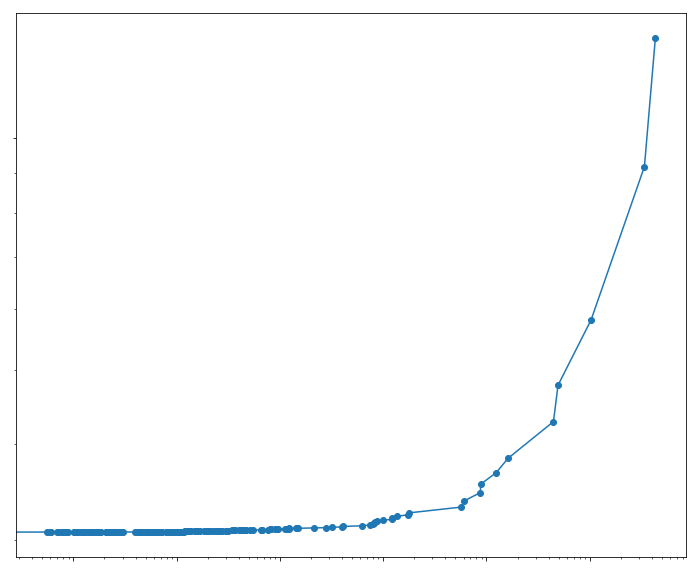

In [126]:
fig,ax=plt.subplots(figsize=(12,10))
ax.plot(ccp_alphas[:-1],impurities[:-1],marker='o',)#drawstyle='steps-post'
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.xscale('log')
plt.yscale('log')

In [129]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

In [153]:
features=X.columns.tolist()
#features_=[i.split('_')[-1] for i in features[-11:-1]]
features=[i.replace('&','_and_') for i in features]
#features[-11:-1]=features_
features

['SEAM_HEIGHT',
 'AVG_EMP_TOTAL',
 'PCT_HRS_UNDERGROUND',
 'PCT_HRS_SURFACE',
 'PCT_HRS_STRIP',
 'PCT_HRS_AUGER',
 'PCT_HRS_CULM_BANK',
 'PCT_HRS_DREDGE',
 'PCT_HRS_OTHER_SURFACE',
 'PCT_HRS_SHOP_YARD',
 'PCT_HRS_MILL_PREP',
 'PCT_HRS_OFFICE',
 'INJ_RATE_PER2K',
 'COMMODITY_Coal',
 'COMMODITY_Metal',
 'COMMODITY_Nonmetal',
 'COMMODITY_Sand _and_ gravel',
 'COMMODITY_Stone',
 'TYPE_OF_MINE_Mill',
 'TYPE_OF_MINE_Sand _and_ gravel',
 'TYPE_OF_MINE_Surface',
 'TYPE_OF_MINE_Underground',
 'ADJ_STATUS_Intermittent',
 'ADJ_STATUS_Open']

In [154]:
dot_data=StringIO()
tree.export_graphviz(tree_reduced,out_file=dot_data,class_names=['EMP_HRS_TOTAL/2000','NUM_INJURIES'],feature_names=features,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())